<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/Sales_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sales_data.csv')
df.head(11)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59
5,2022-01-01,S001,P0006,Toys,North,209,60,0,35.53,0,Snowy,0,40.01,Winter,0,55
6,2022-01-01,S001,P0007,Groceries,North,118,81,335,23.27,5,Snowy,0,24.78,Winter,0,94
7,2022-01-01,S001,P0008,Electronics,North,244,42,0,37.79,5,Snowy,0,44.85,Winter,0,61
8,2022-01-01,S001,P0009,Clothing,North,115,88,139,94.20,5,Snowy,0,108.70,Winter,0,129
9,2022-01-01,S001,P0010,Furniture,North,192,70,300,113.35,10,Snowy,0,129.98,Winter,0,69


In [3]:
df.tail(11)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
75989,2024-01-30,S005,P0010,Groceries,North,115,81,0,52.94,5,Snowy,0,58.84,Winter,0,78
75990,2024-01-30,S005,P0011,Electronics,North,269,49,0,74.76,0,Snowy,0,79.26,Winter,0,74
75991,2024-01-30,S005,P0012,Furniture,North,375,35,0,107.91,10,Snowy,0,119.01,Winter,0,54
75992,2024-01-30,S005,P0013,Groceries,North,792,78,0,78.12,0,Snowy,0,72.58,Winter,0,97
75993,2024-01-30,S005,P0014,Furniture,North,161,96,0,182.88,5,Snowy,0,214.68,Winter,0,120
75994,2024-01-30,S005,P0015,Groceries,North,520,116,0,48.62,10,Snowy,0,53.71,Winter,0,122
75995,2024-01-30,S005,P0016,Toys,North,233,63,0,29.80,5,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137,115,141,42.92,5,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197,44,0,17.81,10,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125,58,0,151.72,0,Snowy,0,143.71,Winter,0,84


In [5]:
df.shape

(76000, 16)

In [6]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
       'Weather Condition', 'Promotion', 'Competitor Pricing', 'Seasonality',
       'Epidemic', 'Demand'],
      dtype='object')

In [4]:
df.dtypes

,0
Date,object
Store ID,object
Product ID,object
Category,object
Region,object
Inventory Level,int64
Units Sold,int64
Units Ordered,int64
Price,float64
Discount,int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [12]:
df.isnull().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Price,0
Discount,0


In [10]:
df.describe(include = 'all')

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
count,76000,76000,76000,76000,76000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000,76000.000000,76000.000000,76000,76000.000000,76000.000000
unique,760,5,20,5,4,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN
top,2024-01-30,S001,P0001,Groceries,North,NaN,NaN,NaN,NaN,NaN,Cloudy,NaN,NaN,Winter,NaN,NaN
freq,100,15200,3800,30400,30400,NaN,NaN,NaN,NaN,NaN,24360,NaN,NaN,21000,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,301.062842,88.827316,89.090645,67.726028,9.087039,NaN,0.328947,69.454029,NaN,0.200000,104.317158
std,NaN,NaN,NaN,NaN,NaN,226.510161,43.994525,162.404627,39.377899,7.475781,NaN,0.469834,40.943818,NaN,0.400003,46.964801
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.740000,0.000000,NaN,0.000000,4.290000,NaN,0.000000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,136.000000,58.000000,0.000000,31.997500,5.000000,NaN,0.000000,32.620000,NaN,0.000000,71.000000
50%,NaN,NaN,NaN,NaN,NaN,227.000000,84.000000,0.000000,64.500000,10.000000,NaN,0.000000,65.700000,NaN,0.000000,100.000000
75%,NaN,NaN,NaN,NaN,NaN,408.000000,114.000000,121.000000,95.830000,10.000000,NaN,1.000000,97.932500,NaN,0.000000,133.000000


In [13]:
df.duplicated().sum()

np.int64(0)

# Handling Outliers:

In [23]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

df_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print(f'Original Shape: {len(df)}')
print(f'Shape after outlier handling: {len(df_outliers)}')

Original Shape: 76000
Shape after outlier handling: 70075


# Univariate Analysis:

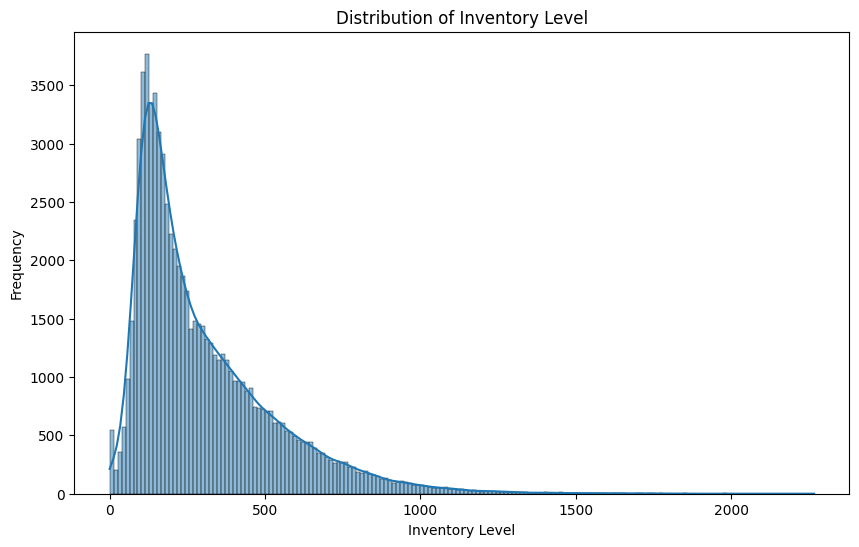

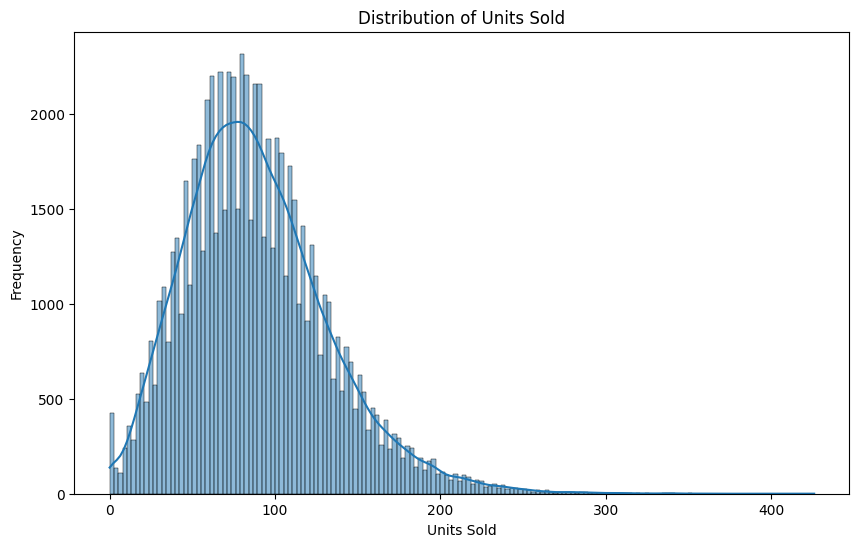

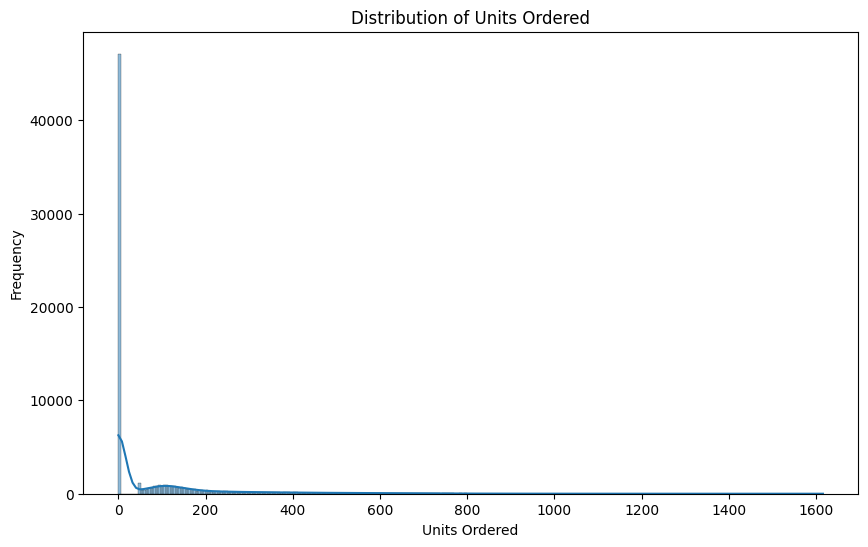

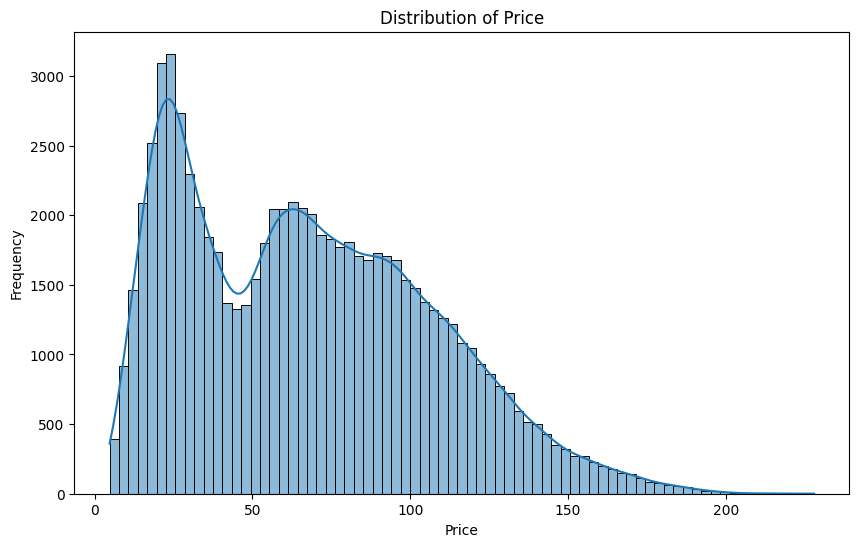

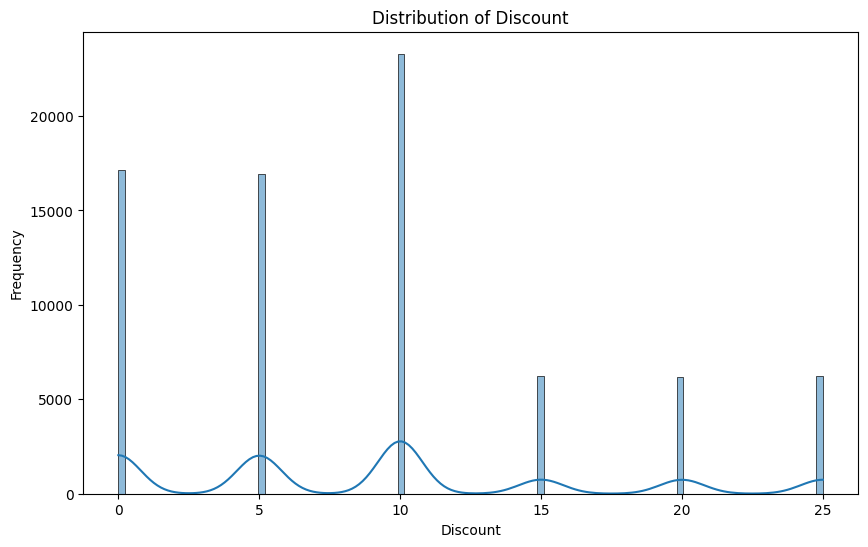

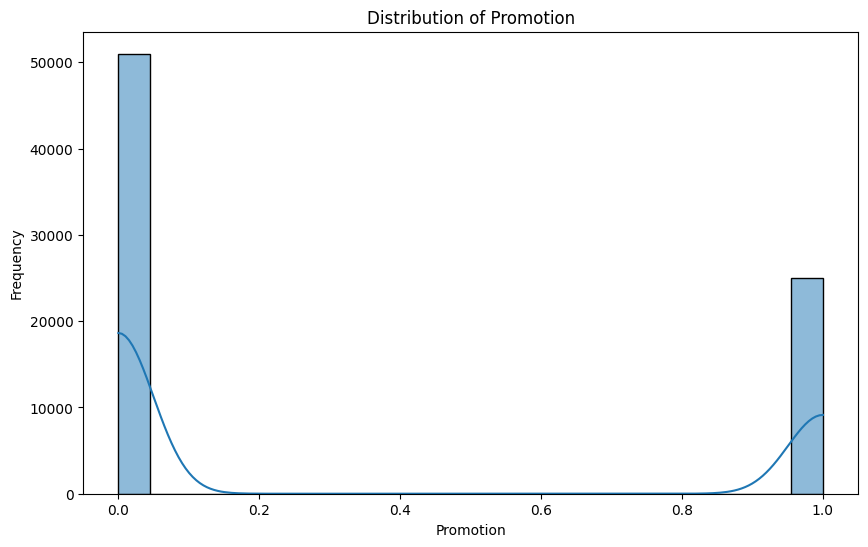

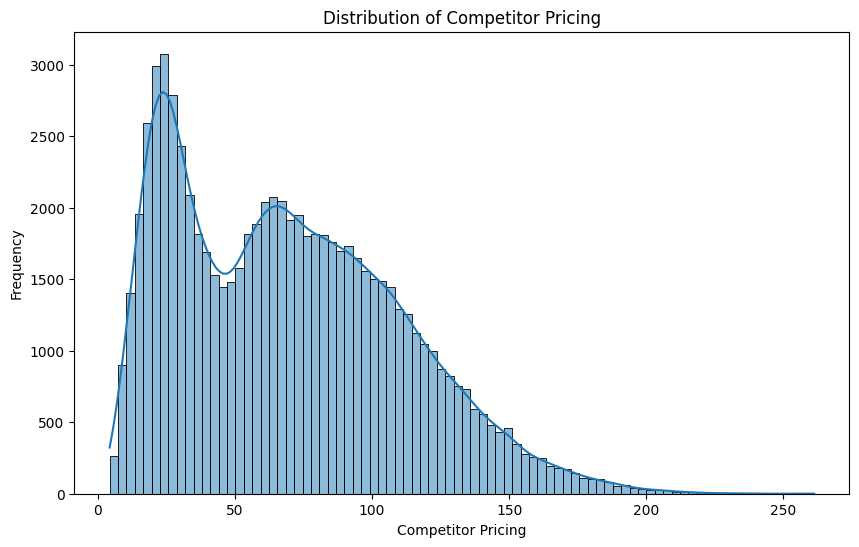

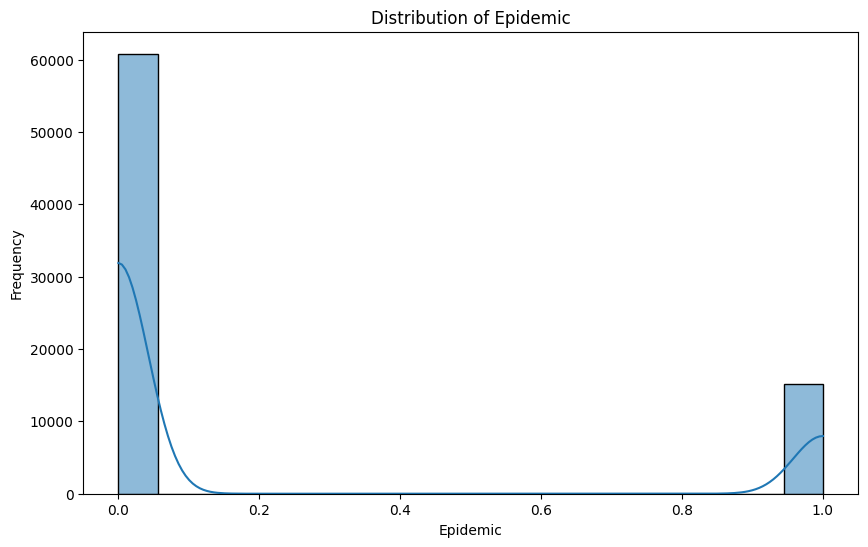

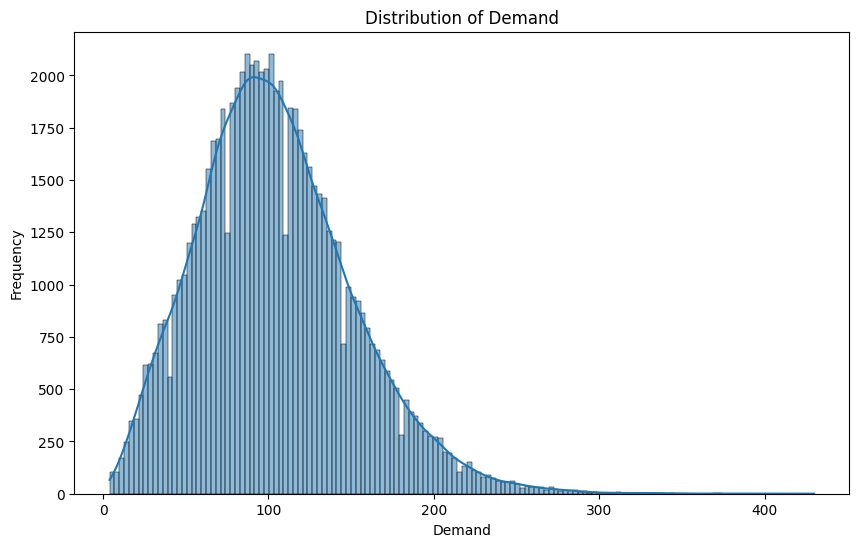

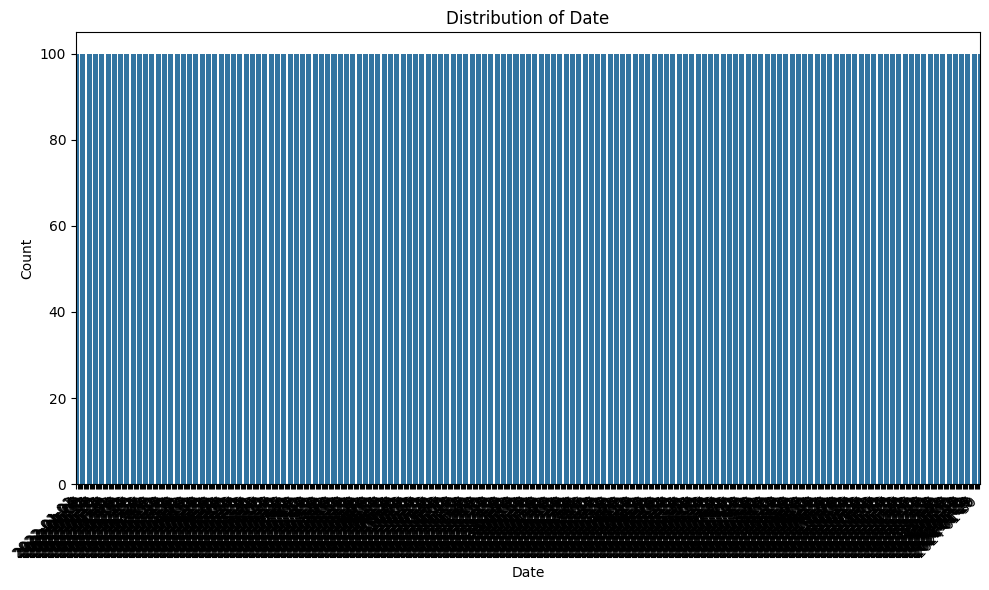

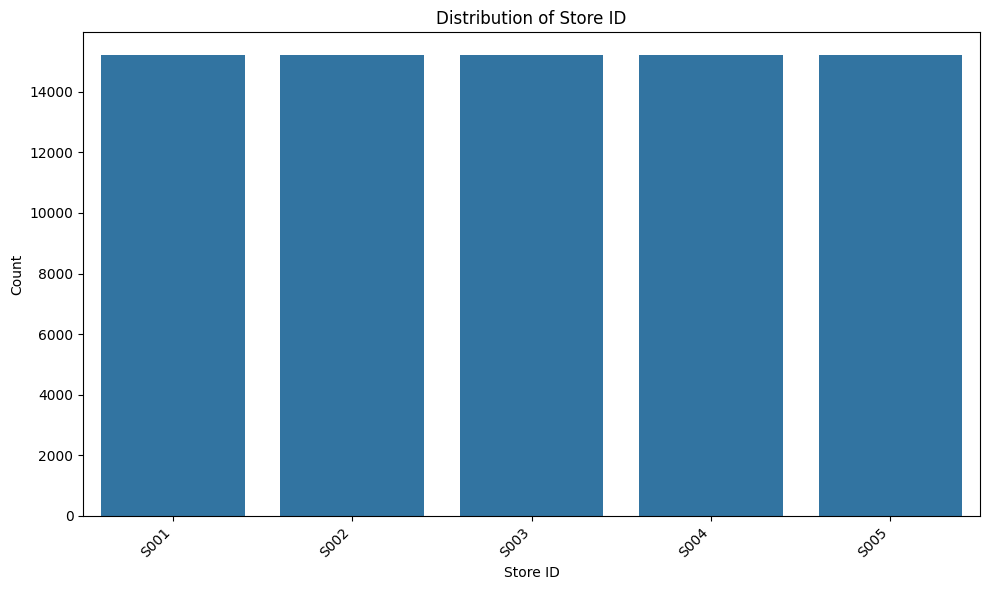

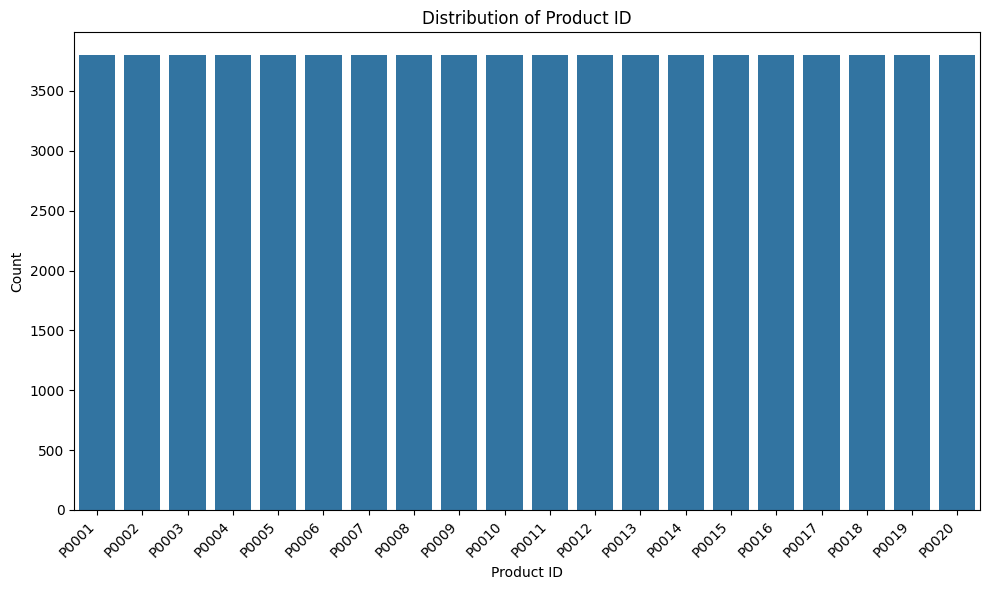

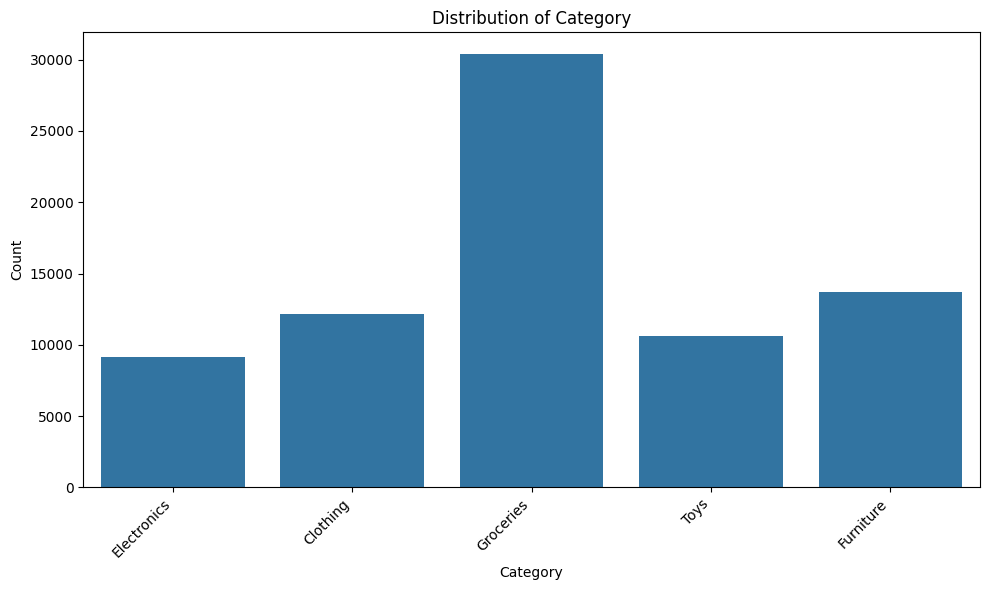

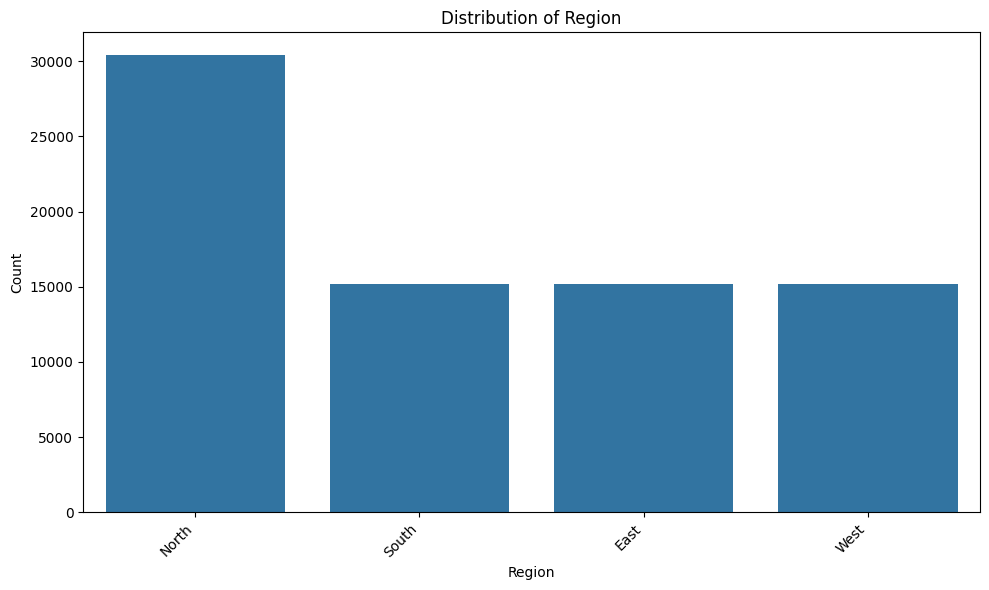

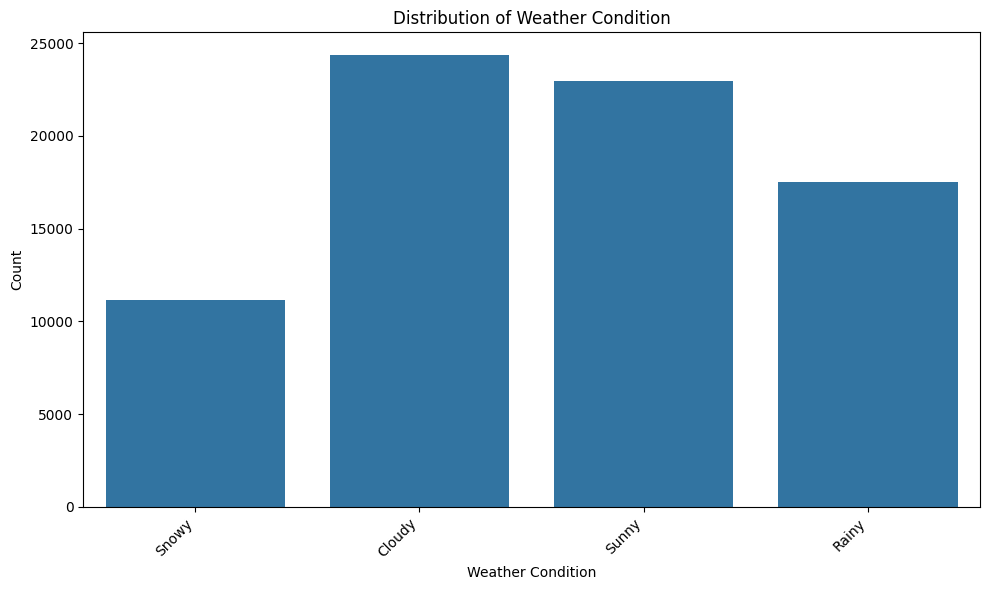

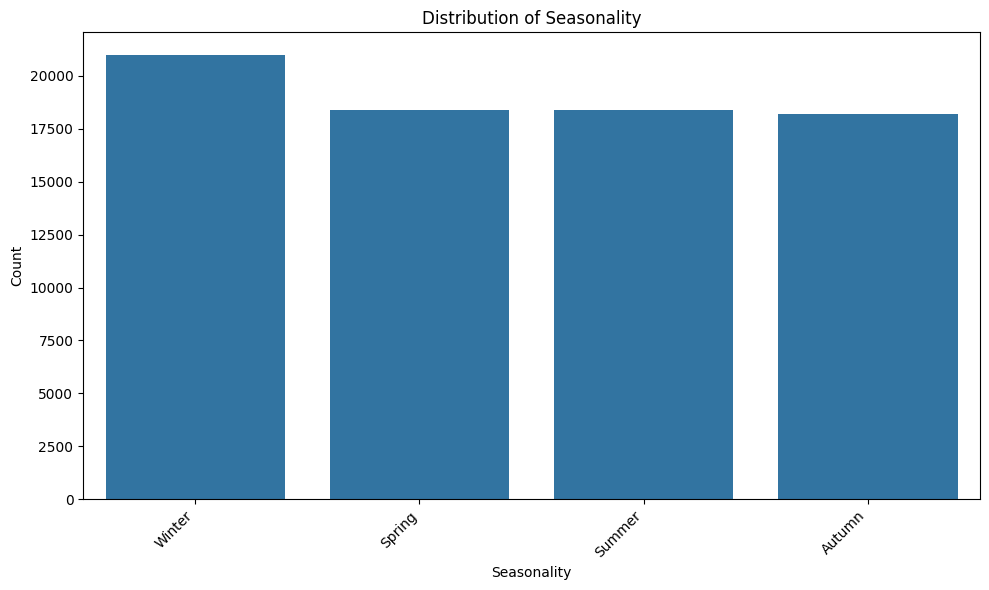

Value counts for Date:
Date
2024-01-30    100
2022-01-01    100
2022-01-02    100
2022-01-03    100
2022-01-04    100
             ... 
2022-01-13    100
2022-01-12    100
2022-01-11    100
2022-01-10    100
2022-01-09    100
Name: count, Length: 760, dtype: int64

Value counts for Store ID:
Store ID
S001    15200
S002    15200
S003    15200
S004    15200
S005    15200
Name: count, dtype: int64

Value counts for Product ID:
Product ID
P0001    3800
P0002    3800
P0003    3800
P0004    3800
P0005    3800
P0006    3800
P0007    3800
P0008    3800
P0009    3800
P0010    3800
P0011    3800
P0012    3800
P0013    3800
P0014    3800
P0015    3800
P0016    3800
P0017    3800
P0018    3800
P0019    3800
P0020    3800
Name: count, dtype: int64

Value counts for Category:
Category
Groceries      30400
Furniture      13680
Clothing       12160
Toys           10640
Electronics     9120
Name: count, dtype: int64

Value counts for Region:
Region
North    30400
South    15200
East     15200
West     

In [15]:
# Get a list of numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Iterate through numerical columns and create histograms
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Get a list of categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Temporarily disable mathtext parsing for tick labels
plt.rcParams['text.usetex'] = False # Moved outside the loop to apply to all categorical plots

# Iterate through categorical columns and create countplots
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    # Ensure the data in the column is treated as string to avoid issues with non-string types
    sns.countplot(data=df, x=df[col].astype(str))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for col in categorical_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

# Bivariate Analysis:

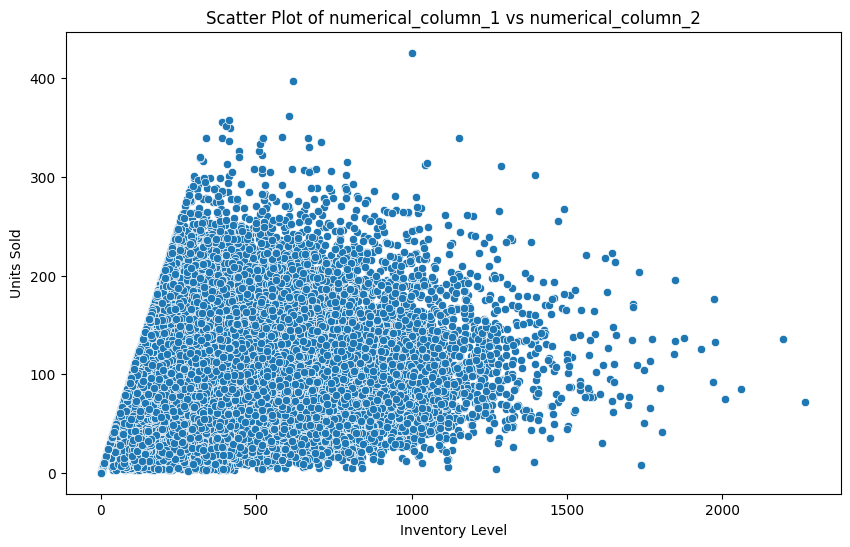

In [19]:
# Scatter-Plot:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Inventory Level', y='Units Sold')
plt.title('Scatter Plot of numerical_column_1 vs numerical_column_2')
plt.xlabel('Inventory Level')
plt.ylabel('Units Sold')
plt.show()

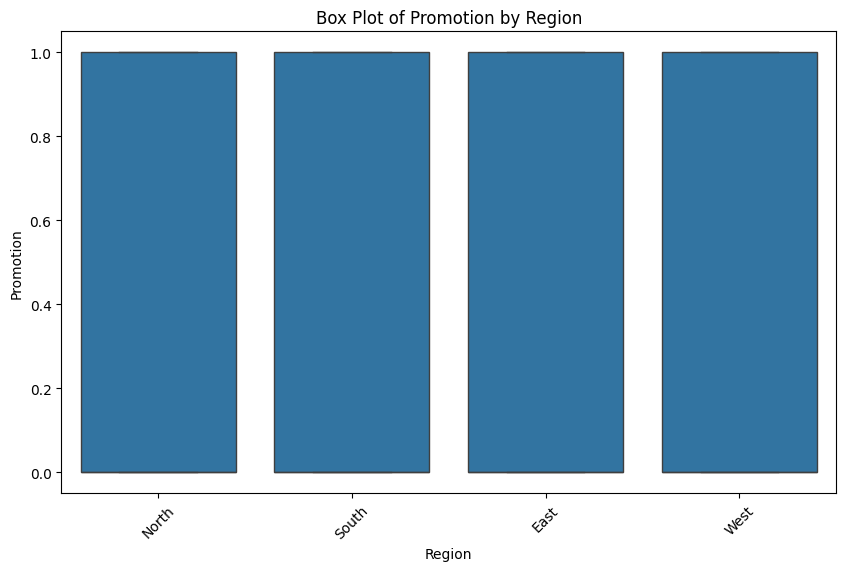

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Promotion')
plt.title('Box Plot of Promotion by Region')
plt.xlabel('Region')
plt.ylabel('Promotion')
plt.xticks(rotation=45)
plt.show()

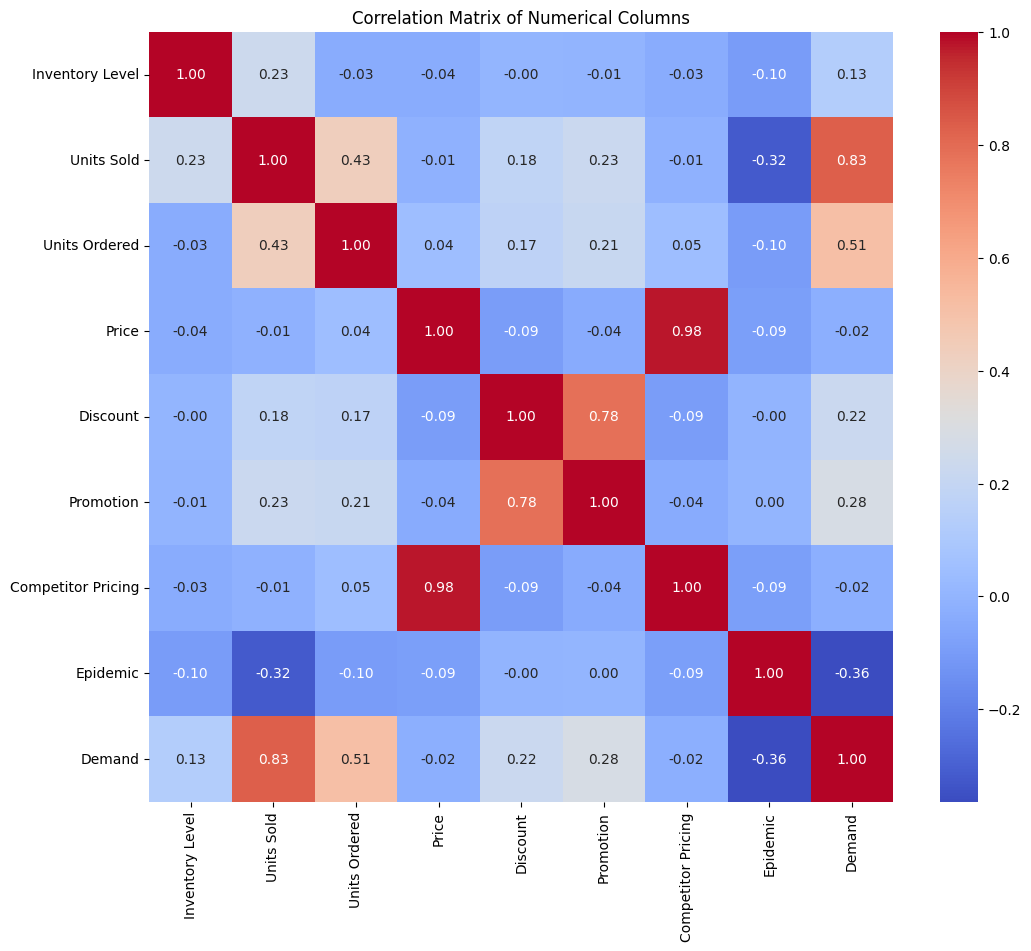

In [21]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()